In [147]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SQLContext, Row
from collections import OrderedDict
from operator import itemgetter

In [148]:
# The code was removed by DSX for sharing.

In [149]:
print "Record size: " + str(dataFrame.count())

Record size: 53085


In [150]:
print "Data Schema:"
dataFrame.printSchema()

Data Schema:
root
 |-- Date: string (nullable = true)
 |-- City, State: string (nullable = true)
 |-- Street: string (nullable = true)
 |-- Railroad: string (nullable = true)
 |-- Description: string (nullable = true)



In [151]:
print "Data:"
dataFrame.show(10)

Data:
+----------------+--------------------+------------+--------------------+--------------------+
|            Date|         City, State|      Street|            Railroad|         Description|
+----------------+--------------------+------------+--------------------+--------------------+
|12/31/1997 16:45|            OKLAHOMA|       171ST|BNSF Railway Company|                null|
|12/31/1997 15:50|           MINNESOTA| COUNTY ROAD|BNSF Railway Company|                null|
|12/31/1997 15:00|       PERRY, KANSAS|       FRONT|Union Pacific Rai...|                null|
|12/31/1997 14:50|LA GRANGE, TENNESSEE| CHESTNUT ST|Norfolk Southern ...|                null|
|12/31/1997 11:00|        LA RUE, OHIO|     RTE 245|Consolidated Rail...|ML452X NORMAL MOV...|
|12/31/1997 10:15|          CALIFORNIA| EDINGER AVE|BNSF Railway Company|                null|
| 12/31/1997 0:30|        OREGON, OHIO|   GREENWOOD|Norfolk Southern ...|                null|
|12/30/1997 20:03|MORGAN HILL, CALI...|RICHM

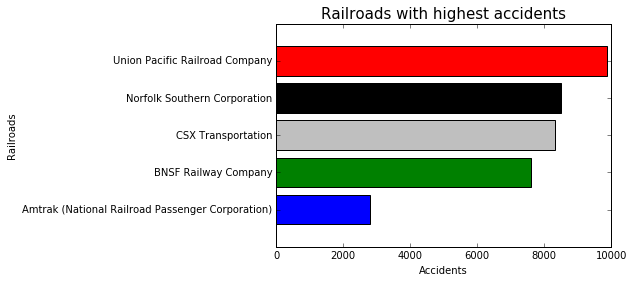

In [152]:
railroads = dataFrame.groupBy('Railroad').count().sort('count', ascending=False).toPandas()
railroads = railroads.ix[:4]
colors = ['r','k','0.75','g','b']
plt.barh(range(5),railroads['count'], align="center", color=colors)
plt.xlabel('Accidents')
plt.ylabel('Railroads')
plt.title('Railroads with highest accidents', size=15)
plt.yticks(range(5), railroads['Railroad'])
plt.gca().invert_yaxis()
plt.show()

In [153]:
states = [
  'Alabama',
  'Alaska',
  'Arizona',
  'Arkansas',
  'California',
  'Colorado',
  'Connecticut',
  'Delaware',
  'District of Columbia',
  'Florida',
  'Georgia',
  'Hawaii',
  'Idaho',
  'Illinois',
  'Indiana',
  'Iowa',
  'Kansas',
  'Kentucky',
  'Louisiana',
  'Maine',
  'Maryland',
  'Massachusetts',
  'Michigan',
  'Minnesota',
  'Mississippi',
  'Missouri',
  'Montana',
  'Nebraska',
  'Nevada',
  'New Hampshire',
  'New Jersey',
  'New Mexico',
  'New York',
  'North Carolina',
  'North Dakota',
  'Ohio',
  'Oklahoma',
  'Oregon',
  'Pennsylvania',
  'Rhode Island',
  'South Carolina',
  'South Dakota',
  'Tennessee',
  'Texas',
  'Utah',
  'Vermont',
  'Virginia',
  'Washington',
  'West Virginia',
  'Wisconsin',
  'Wyoming'
]

danger_states = {}
for state in states:
    danger_states[state] = dataFrame.filter(dataFrame["City, State"].rlike("(?i)"+state)).count()

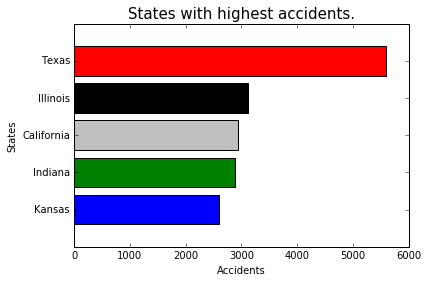

In [154]:
danger_states_ordered = OrderedDict(sorted(danger_states.items(), key=itemgetter(1), reverse=True)[:5])

plt.barh(np.arange(len(danger_states_ordered)), danger_states_ordered.values(), align="center", color=colors)
plt.xlabel('Accidents')
plt.ylabel('States')
plt.title('States with highest accidents.', size=15)
plt.yticks(np.arange(len(danger_states_ordered)), danger_states_ordered.keys())
plt.gca().invert_yaxis()
plt.show()